<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/CNN_FASHON_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import thư viện

In [1]:
import cv2
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam, RMSprop,SGD

# Load và xử lý data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_pre = x_test
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

# Tạo model

In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1 )))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

#ANN
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

# Compile và train

In [5]:
opt= SGD(lr=0.01,momentum = 0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
469/469 [==============================] - 111s 236ms/step - loss: 0.5654 - accuracy: 0.7923 - val_loss: 0.4056 - val_accuracy: 0.8503
Epoch 2/10
469/469 [==============================] - 96s 205ms/step - loss: 0.3410 - accuracy: 0.8773 - val_loss: 0.3538 - val_accuracy: 0.8717
Epoch 3/10
469/469 [==============================] - 95s 203ms/step - loss: 0.2939 - accuracy: 0.8919 - val_loss: 0.3074 - val_accuracy: 0.8899
Epoch 4/10
469/469 [==============================] - 96s 204ms/step - loss: 0.2648 - accuracy: 0.9029 - val_loss: 0.3002 - val_accuracy: 0.8896
Epoch 5/10
469/469 [==============================] - 96s 205ms/step - loss: 0.2401 - accuracy: 0.9119 - val_loss: 0.2839 - val_accuracy: 0.8940
Epoch 6/10
469/469 [==============================] - 96s 205ms/step - loss: 0.2234 - accuracy: 0.9174 - val_loss: 0.2816 - val_accuracy: 0.9002
Epoch 7/10
469/469 [==============================] - 95s 202ms/step - loss: 0.2104 - accuracy: 0.9216 - val_loss: 0.2603 - val_a

In [6]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.2516 - accuracy: 0.9095
Test score: 0.25156205892562866
Test accuracy: 0.909500002861023


# Vẽ đồ thị

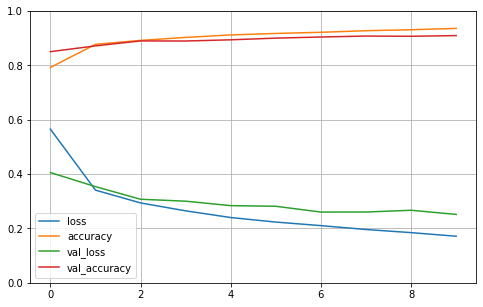

In [7]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

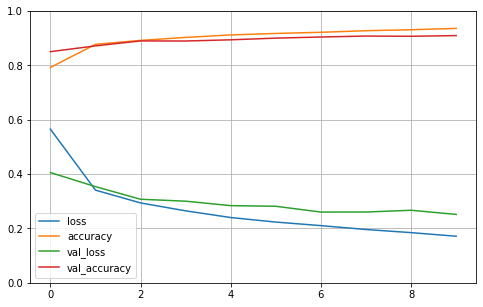

In [8]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Kiểm tra

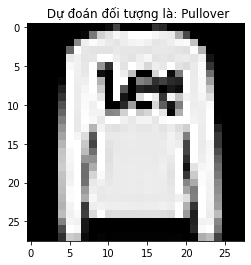

In [10]:
Label = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
test = 1
plt.title(" Dự đoán đối tượng là: " + Label[np.argmax(model.predict(x_pre[test].reshape(-1,28,28,1)))])
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))

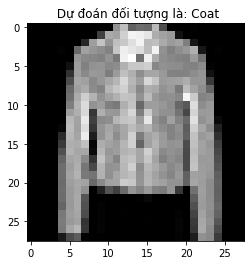

In [11]:
test = 10
plt.title(" Dự đoán đối tượng là: " + Label[np.argmax(model.predict(x_pre[test].reshape(-1,28,28,1)))])
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))

In [12]:
model.save('CNN_FASHION_MNIST.h5')